pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

To Start with we will load any libraries and then load up out dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #used for slightly fancier plots
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import files
import io

uploaded = files.upload()

train = pd.read_csv(io.BytesIO(uploaded['TitanicTrain.csv']), sep=',')



KeyError: ignored

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

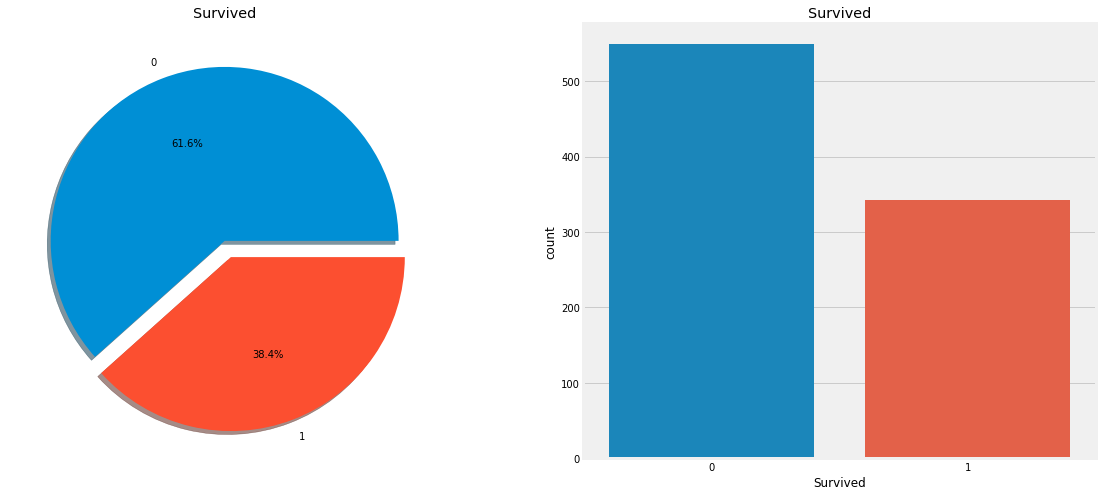

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])

ax[1].set_title('Survived')
plt.show()

Lets start looking at different features, ans thier relationships to the 'survive' dependant feature.


In [0]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

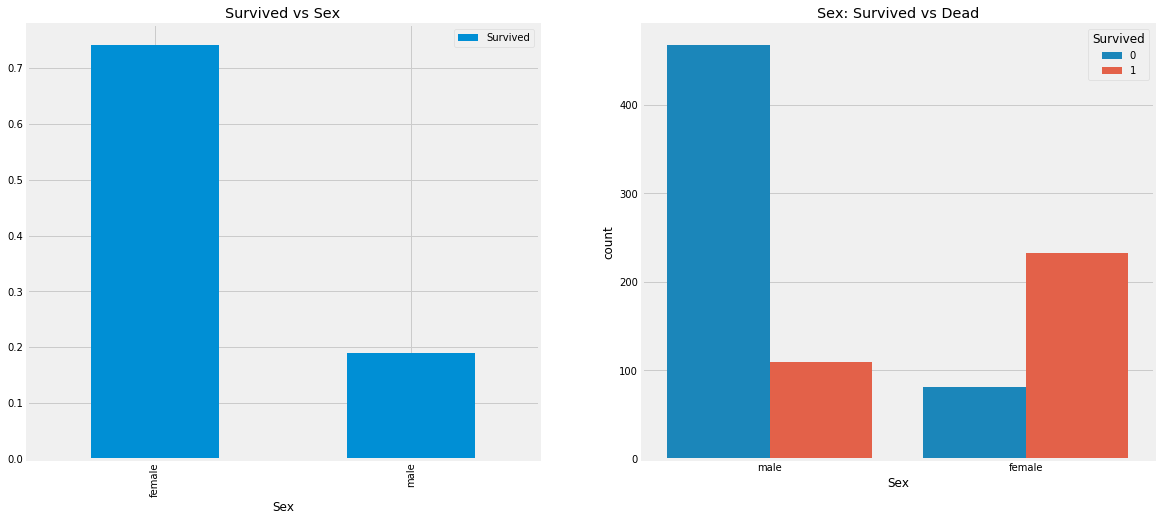

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [0]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


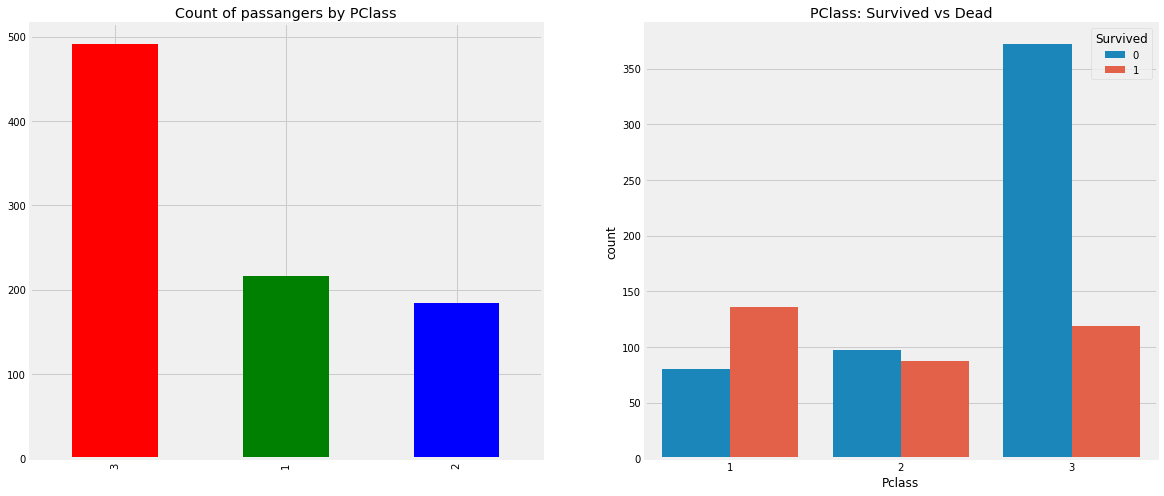

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['red', 'green', 'blue'], ax=ax[0])
ax[0].set_title('Count of passangers by PClass')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')
plt.show()

In [0]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

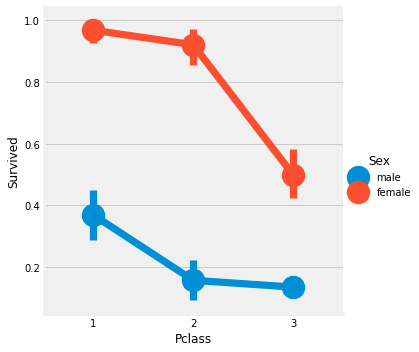

In [0]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

COntinueing on looking at the features and how they correlate to Survived lets go on with age

In [0]:
print('Oldest Passenger is ', train['Age'].max(), 'Years old.')
print('Youngest Passenger is ', train['Age'].min(), 'Years old.')
print('Average Passenger age is ', train['Age'].mean(), 'Years old.')


Oldest Passenger is  80.0 Years old.
Youngest Passenger is  0.42 Years old.
Average Passenger age is  29.69911764705882 Years old.


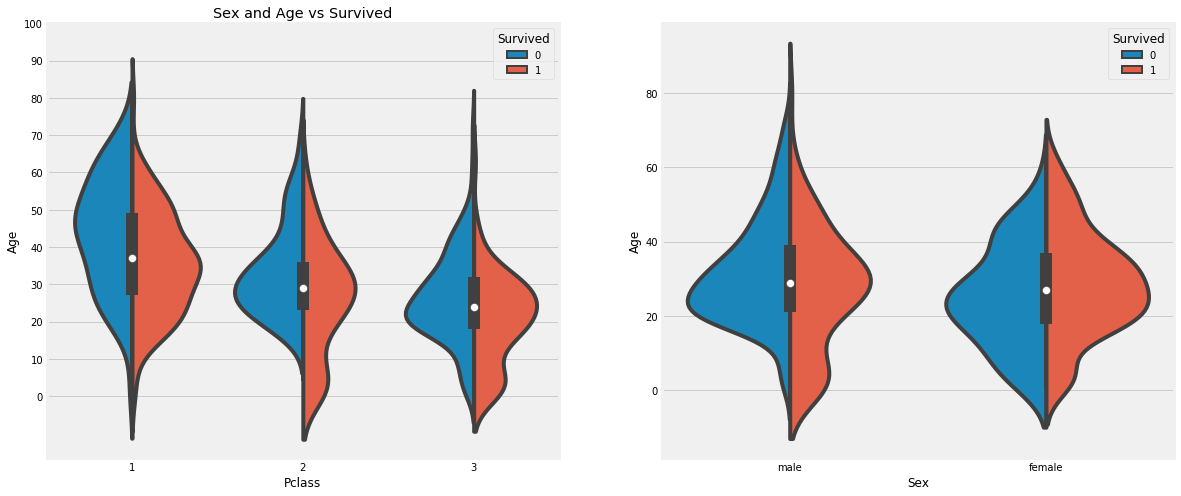

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True,ax=ax[1])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
plt.show()

The easiest way to fix missing values is to use the average; and that could be done by a specific feature.

Lets use the Name feature. Most of them have a title associated with them.

In [0]:
train['Initial']=0
for i in train:
  train['Initial']=train.Name.str.extract('([A-Za-z]+)\.')

In [0]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
train['Initial'].replace(['Mlle','Mme' , 'Ms'  ,'Dr'   , 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col'   , 'Rev'   , 'Capt'  , 'Sir', 'Don'],
                                          ['Miss','Miss', 'Miss','Other', 'Other'   , 'Mrs' , 'Mrs'     , 'Other', 'Other' , 'Other' , 'Other' , 'Other' , 'Other'])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Initial, Length: 891, dtype: object

In [0]:
train.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [0]:
train.loc[(train.Age.isnull()) & (train.Initial=='Mr'), 'Age']=32
train.loc[(train.Age.isnull()) & (train.Initial=='Mrs'), 'Age']=36
train.loc[(train.Age.isnull()) & (train.Initial=='Master'), 'Age']=5
train.loc[(train.Age.isnull()) & (train.Initial=='Miss'), 'Age']=22
train.loc[(train.Age.isnull()) & (train.Initial=='Other'), 'Age']=46


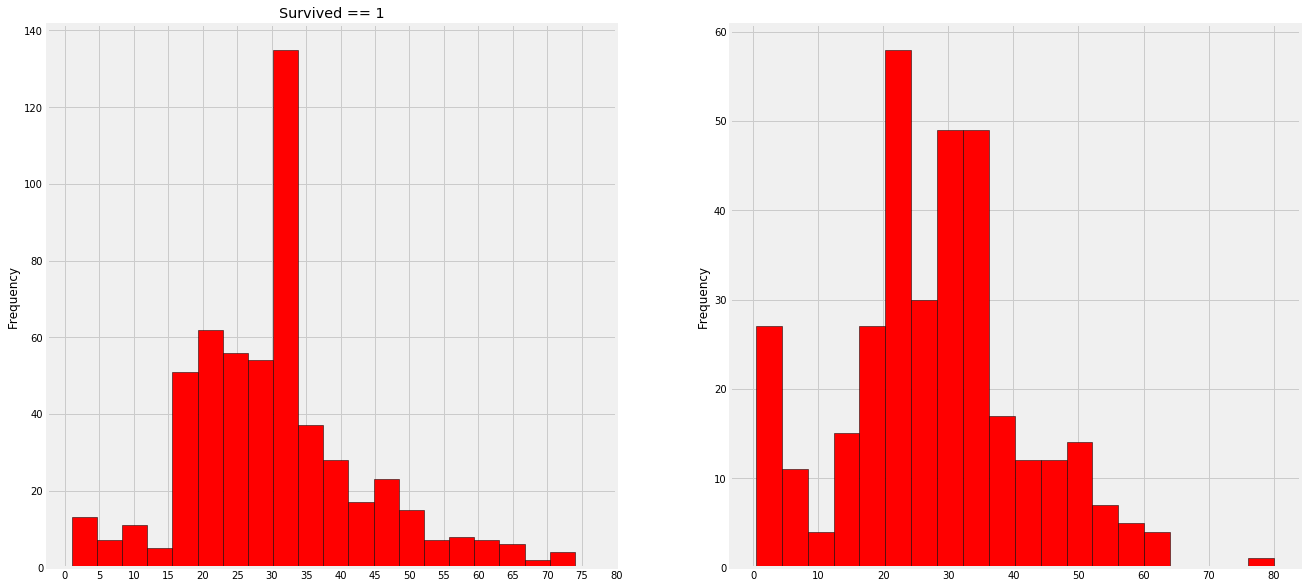

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived == 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived == 1')
x2 = list(range(0,85,5))
ax[0].set_xticks(x2)

plt.show()

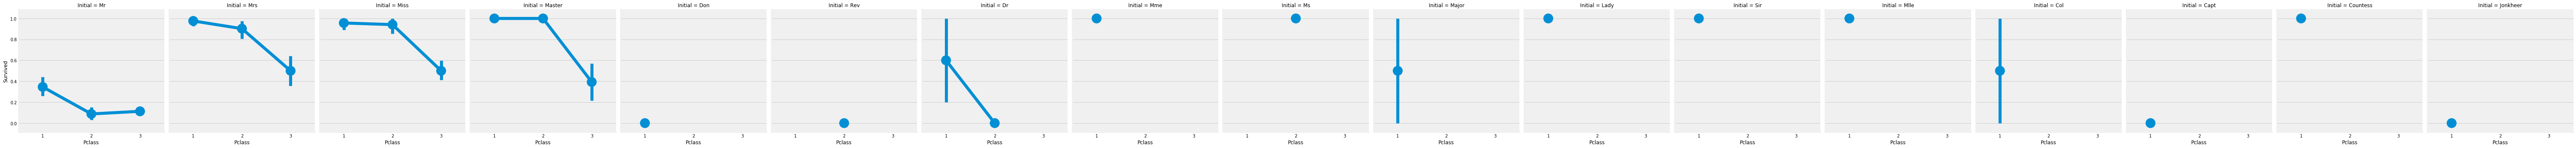

In [0]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=train)

Skipping ahead to parents and children

In [0]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


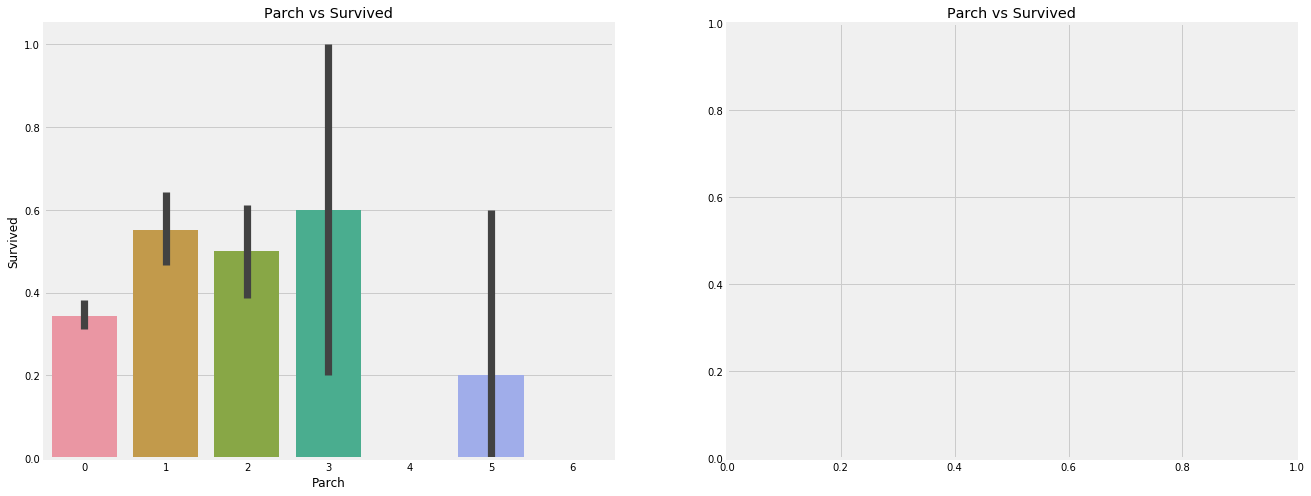

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch', 'Survived', data=train, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=train, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

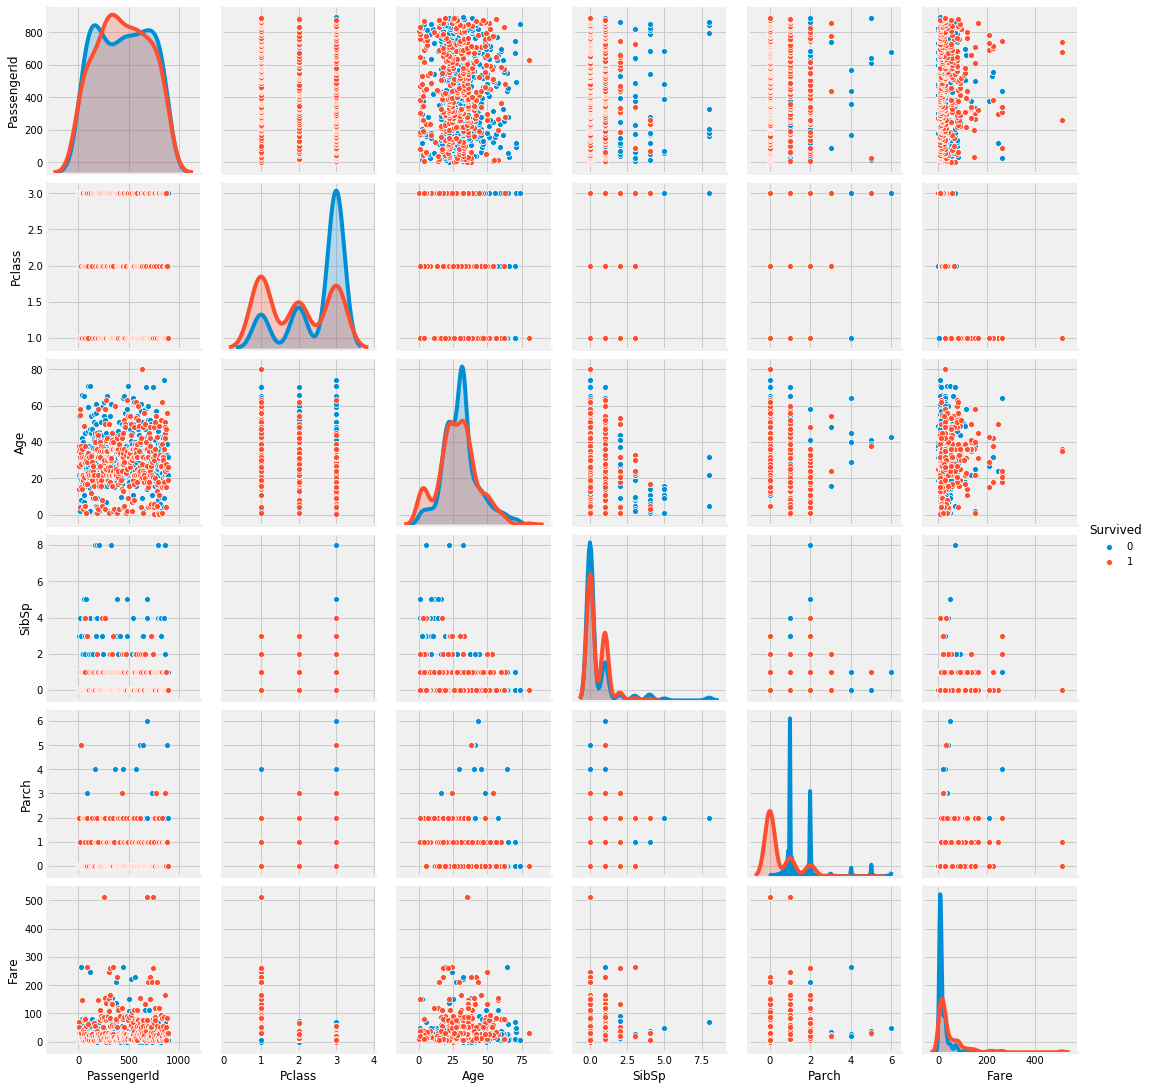

In [0]:
sns.pairplot(data=train, hue='Survived')